In [1]:
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_random_images(dataset, num_images=25, grid_size=(5, 5), random_seed=None):
    """
    Display a grid of randomly selected images from a given dataset.

    Parameters:
        - dataset: Dataset object (e.g., torchvision.datasets.CIFAR100)
        - num_images: Number of images to display (default is 25)
        - grid_size: Tuple specifying the grid layout (e.g., (5, 5) for a 5x5 grid)
        - random_seed: Seed for reproducibility (default is None)
    """
    # Set random seed for reproducibility
    if random_seed is not None:
        np.random.seed(random_seed)

    # Get random indices for the images
    random_indices = np.random.choice(len(dataset), num_images, replace=False)

    # Create a grid of subplots
    fig, axes = plt.subplots(*grid_size, figsize=(10, 10))

    for i, ax in enumerate(axes.flatten()):
        # Get a random image and its label
        index = random_indices[i]
        image, label = dataset[index]
        # Display the image
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plot a confusion matrix.

    Parameters:
        - y_true: True labels
        - y_pred: Predicted labels
        - classes: List of class names
    """
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(len(classes), len(classes)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()




In [3]:
data = datasets.CIFAR100('cifar100', train=True, download=True)

Files already downloaded and verified


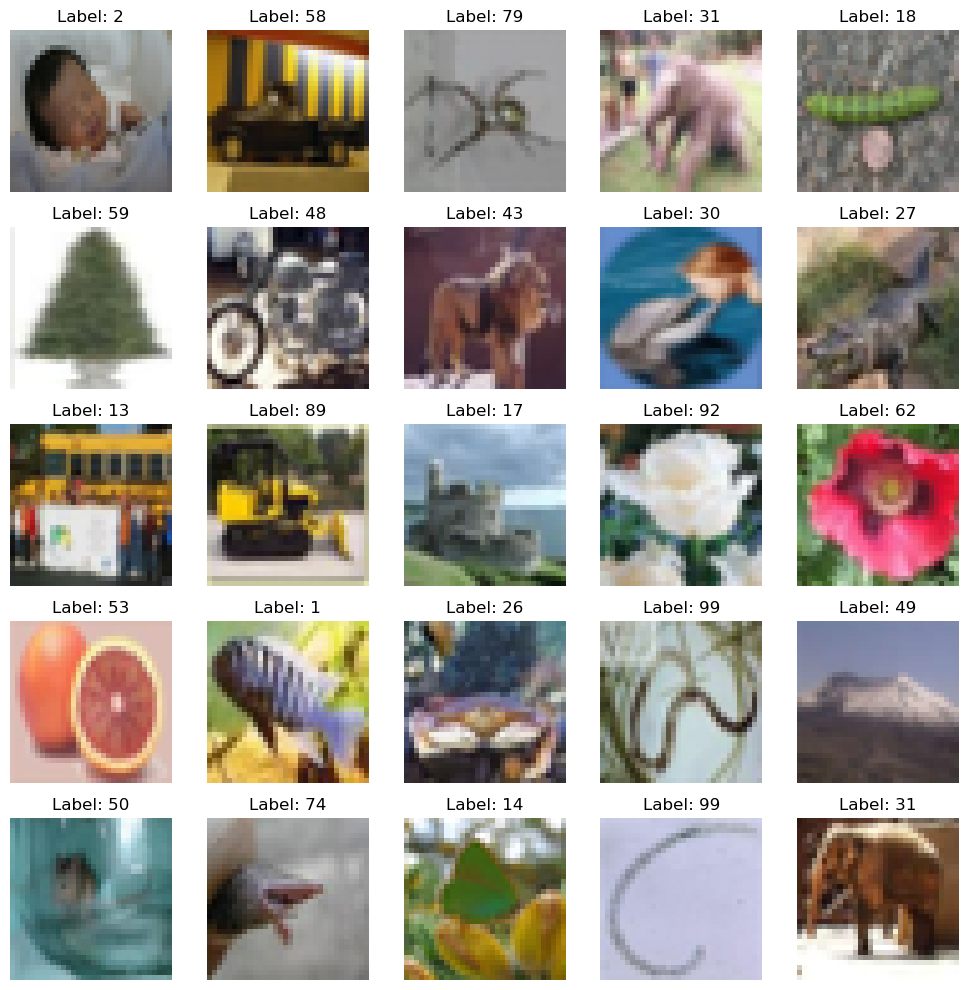

In [4]:
show_random_images(data)

In [5]:
# Example classes for CIFAR-100
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

In [6]:
selected_classes = [0, 1, 2, 3, 4]
selectedClassesLabels = cifar100_classes[:len(selected_classes)]
# Filter data for the selected classes
filterData = [img.flatten() for img, label in zip(data.data, data.targets) if label in selected_classes]
targets = [label for img, label in zip(data.data, data.targets) if label in selected_classes]

In [7]:
X = np.array(filterData)
y = np.array(targets)

In [8]:
xTrain, xTest,yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
xTrain.shape, yTrain.shape

((2000, 3072), (2000,))

In [10]:
data.data[0].shape

(32, 32, 3)

In [11]:
svm = SVC()
svm.fit(xTrain, yTrain)

SVC()

In [12]:
preds = svm.predict(xTest)

In [13]:
accuracy_score(yTest, preds)

0.65

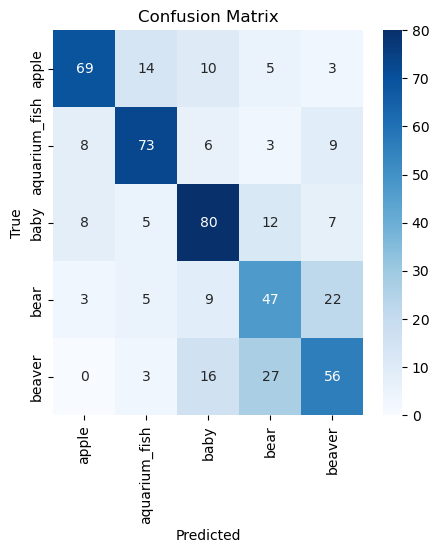

In [14]:
plot_confusion_matrix(yTest, preds, selectedClassesLabels)

### Deep learning CNN

In [15]:
selected_classes = [0, 1, 2, 3, 4]
selectedClassesLabels = cifar100_classes[:len(selected_classes)]
# Filter data for the selected classes
filterData = [img for img, label in zip(data.data, data.targets) if label in selected_classes]
targets = [label for img, label in zip(data.data, data.targets) if label in selected_classes]

In [16]:
filterData = np.array(filterData)
targets = np.array(targets)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

In [18]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(len(selected_classes), activation='softmax'))  # Assuming 5 classes

# Compile the model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(filterData, targets, test_size=0.2, random_state=0)

In [21]:
history = model.fit(xTrain, yTrain, epochs=50)

Epoch 1/50


63/63 [==============================] - 4s 19ms/step - loss: 7.8029 - accuracy: 0.4225
Epoch 2/50
63/63 [==============================] - 1s 18ms/step - loss: 0.9334 - accuracy: 0.6185
Epoch 3/50
63/63 [==============================] - 1s 18ms/step - loss: 0.7418 - accuracy: 0.7015
Epoch 4/50
63/63 [==============================] - 1s 18ms/step - loss: 0.5754 - accuracy: 0.7825
Epoch 5/50
63/63 [==============================] - 1s 17ms/step - loss: 0.4292 - accuracy: 0.8385
Epoch 6/50
63/63 [==============================] - 1s 18ms/step - loss: 0.3125 - accuracy: 0.8960
Epoch 7/50
63/63 [==============================] - 1s 18ms/step - loss: 0.2891 - accuracy: 0.8985
Epoch 8/50
63/63 [==============================] - 1s 18ms/step - loss: 0.2332 - accuracy: 0.9185
Epoch 9/50
63/63 [==============================] - 1s 18ms/step - loss: 0.1700 - accuracy: 0.9495
Epoch 10/50
63/63 [==============================] - 1s 18ms/step - loss: 0.1210 - accuracy: 0.9625
Epoch 1

In [22]:
test_loss, test_accuracy = model.evaluate(xTest, yTest)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

16/16 [==============================] - 1s 9ms/step - loss: 1.8653 - accuracy: 0.7380
Test Accuracy: 73.80%


1/1 [==============================] - 0s 234ms/step


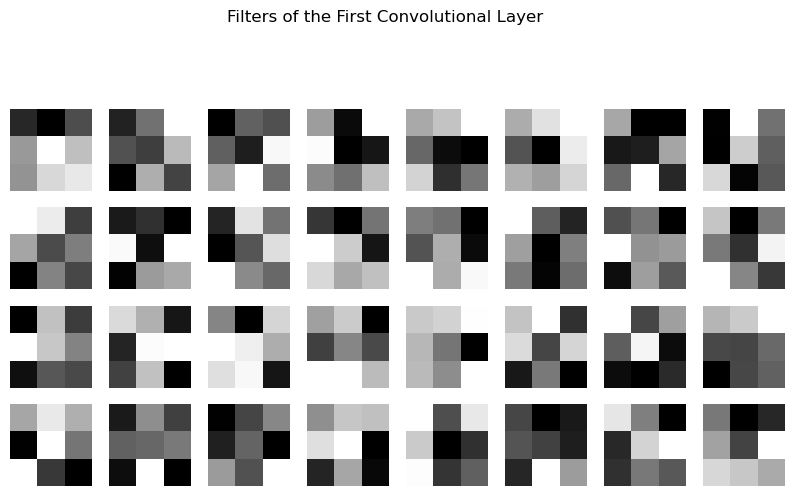

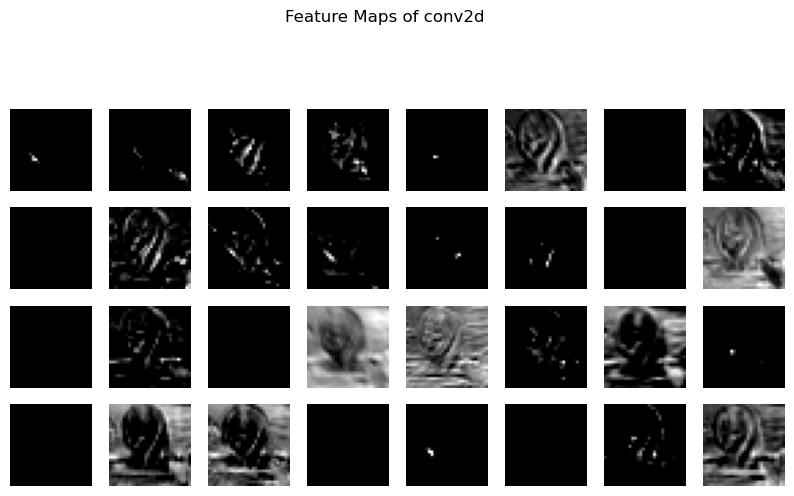

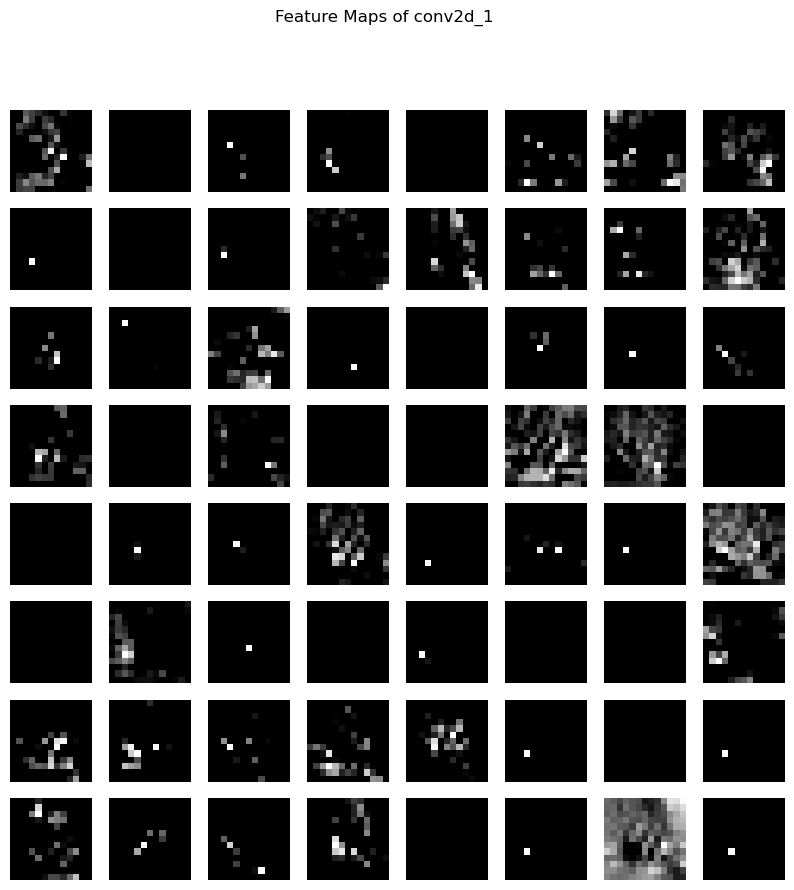

In [23]:
from keras.models import Model
# Extract the outputs of the first convolutional layer
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xTest[:1])  # Using the first test image for visualization

# Visualize the filters
filters = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 10))
for i in range(filters.shape[3]):
    plt.subplot(8, 8, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Filters of the First Convolutional Layer')
plt.show()

# Visualize the feature maps
layer_names = [layer.name for layer in model.layers if isinstance(layer, Conv2D)]
for layer_name, activation in zip(layer_names, activations):
    if activation.shape[3] > 1:  # Check if the layer has multiple channels (feature maps)
        plt.figure(figsize=(10, 10))
        for i in range(activation.shape[3]):
            plt.subplot(8, 8, i+1)
            plt.imshow(activation[0, :, :, i], cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Feature Maps of {layer_name}')
        plt.show()


In [24]:
preds = model.predict(xTest)

16/16 [==============================] - 0s 12ms/step


16/16 [==============================] - 0s 8ms/step


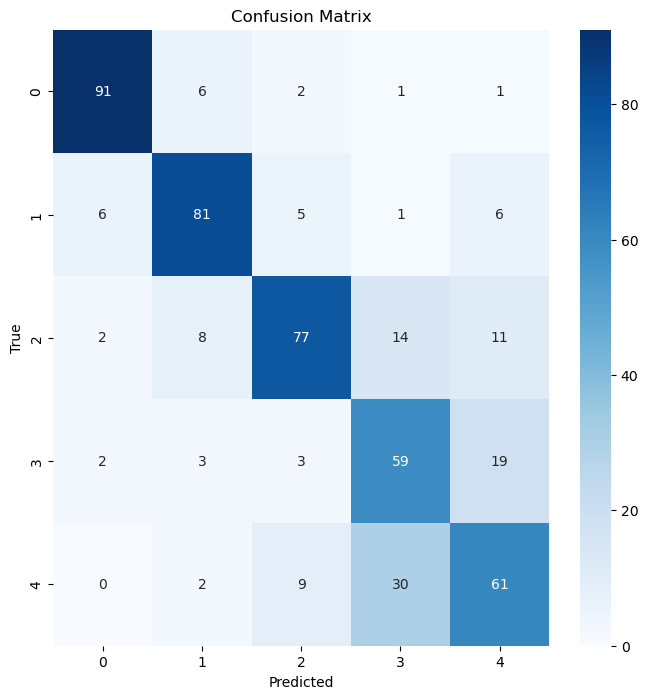

In [25]:
y_pred = np.argmax(model.predict(xTest), axis=1)
cm = confusion_matrix(yTest, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Increasing classes to 50

In [26]:
selected_classes = [x for x in range(50)]
selectedClassesLabels = cifar100_classes[:len(selected_classes)]
# Filter data for the selected classes
filterData = [img.flatten() for img, label in zip(data.data, data.targets) if label in selected_classes]
targets = [label for img, label in zip(data.data, data.targets) if label in selected_classes]

In [27]:
X = np.array(filterData)
y = np.array(targets)

In [28]:
xTrain, xTest,yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
svm = SVC()
svm.fit(xTrain, yTrain)

SVC()

In [30]:
preds = svm.predict(xTest)

In [31]:
accuracy_score(yTest, preds)

0.3268

In [32]:
accuracy_score(yTest, preds)

0.3268

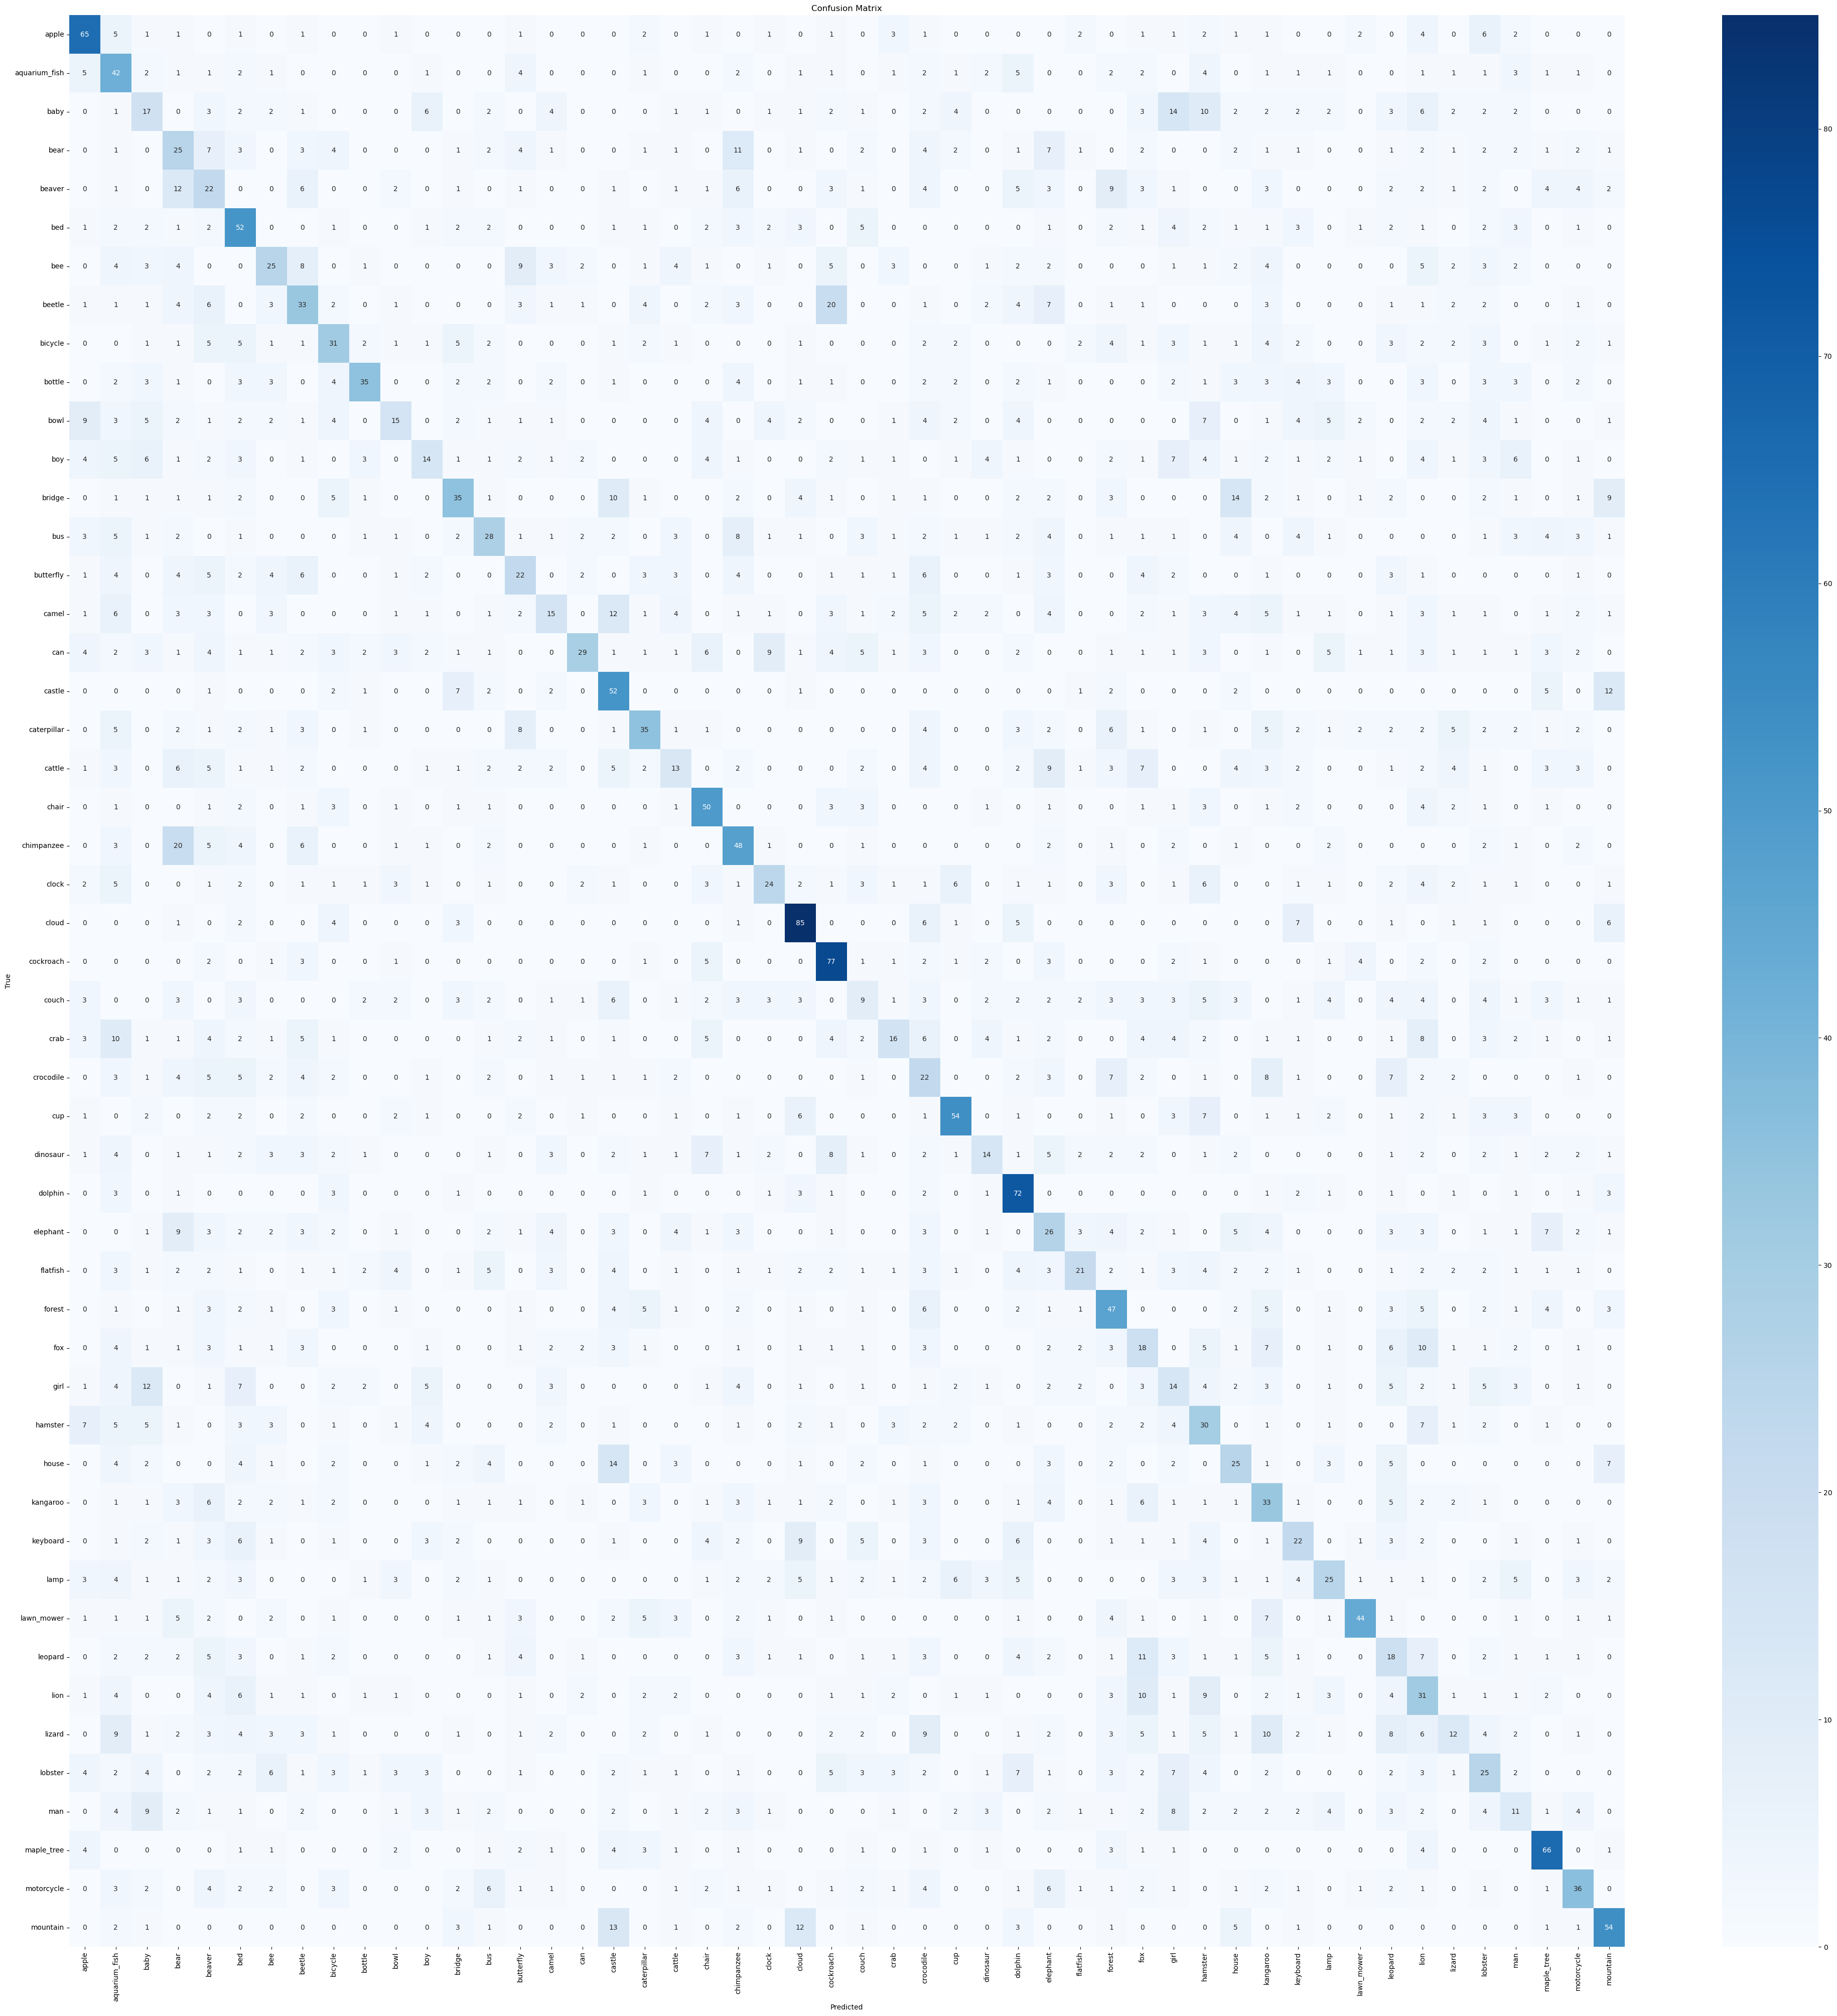

In [33]:
plot_confusion_matrix(yTest, preds, selectedClassesLabels)

### Deep learing

In [34]:
selected_classes = [x for x in range(50)]
selectedClassesLabels = cifar100_classes[:len(selected_classes)]
# Filter data for the selected classes
filterData = [img for img, label in zip(data.data, data.targets) if label in selected_classes]
targets = [label for img, label in zip(data.data, data.targets) if label in selected_classes]

In [35]:
filterData = np.array(filterData)
targets = np.array(targets)

In [36]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(len(selected_classes), activation='softmax'))  # Assuming 5 classes

# Compile the model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy','val'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [42]:
xTrain, xTest, yTrain, yTest = train_test_split(filterData, targets, test_size=0.2, random_state=0)

In [43]:
history = model.fit(xTrain, yTrain, epochs=50)

Epoch 1/50
624/625 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.